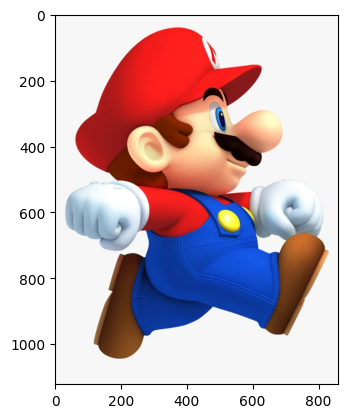

In [1]:
# Importing and showing original image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import skimage as sk
import sys

try:
  image = cv2.imread("image.jpg")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

except:
  print("Unable to open the image")
  sys.exit(1)

plt.imshow(image)

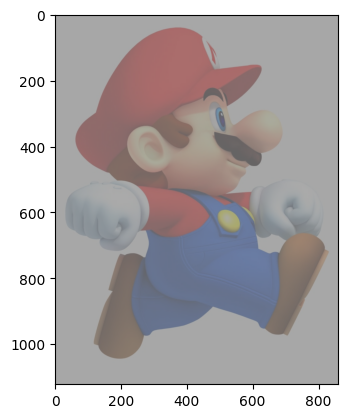

In [2]:
# Task 1: Perform manual contrast-streching on an image while keeping M1 value = 100 and M2 value = 170

def contrast_stretching(image, m1, m2):
    image = image.astype('float')
    min = np.min(image)
    max = np.max(image)
    contrast_streched = (image - min) * ((m2 - m1) / (max - min)) + m1

    contrast_streched = np.clip(contrast_streched, 0, 255).astype('uint8')

    return contrast_streched

plt.imshow(contrast_stretching(image, 100, 170))

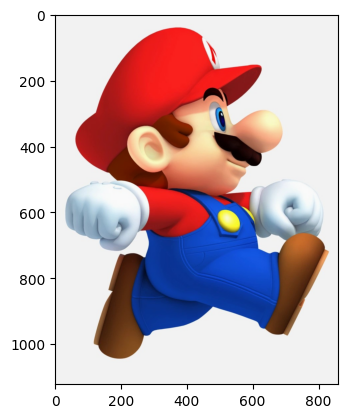

In [3]:
# Task 2: Check with other M values and write about how it changes
# M1 = 25, M2 = 255
plt.imshow(contrast_stretching(image, 0, 250))

# As the difference between M1 and M2 increases, the contrast of the image increases, and the vividness of the colour increases along with, leading to a more clear image

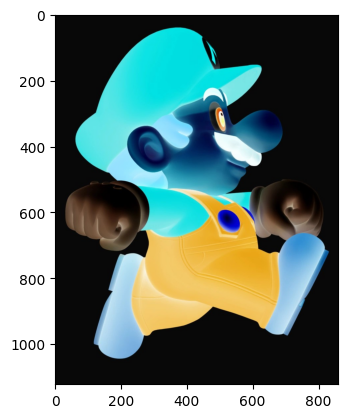

In [4]:
# Task 2: Check with other M values and write about how it changes
# M1 = 255, M2 = 0
plt.imshow(contrast_stretching(image, 255, 0))

# Resulting image becomes inverted when M1 is greater than M2, as the difference between M1 and M2 becomes more negative, the image too becomes negative.

In [5]:
# Task 3: using equalize_hist() with both global and local

def equalize_hist(image, local):

    if local == False: # Global equalize_hist
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        equalized = sk.exposure.equalize_hist(image)
        equalized = cv2.cvtColor((equalized * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)

    elif local == True: # Local equalize_hist
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        equalized = sk.exposure.equalize_adapthist(image)
        equalized = cv2.cvtColor((equalized * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
    else:
        print("Invalid input")
        sys.exit(1)

    return equalized


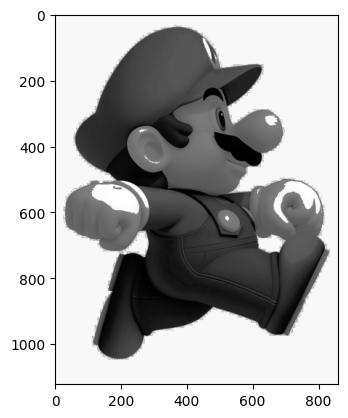

In [6]:
# Task 3
# using Global equalize_hist
plt.imshow(equalize_hist(image, False))

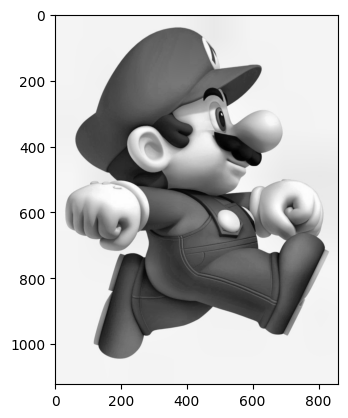

In [7]:
# Task 3:
# using Local equalize_hist
plt.imshow(equalize_hist(image, True))

In [8]:
# Task 4: Few words about which outcome is the best

# It depends on the use case and the image being used.
# With Contrast-Stretching, there is more freedom to alternate values, and allows for inversing, however the contrast is applied to the entire image, and experimenting is required to get the best results.
# If an image has different contrasting levels, using local equalize_hist would be more suitable, it also gives the most similar in depth to the original image, allowing for clear differntiation between the different colours in the original image.
# using Global equalize_hist would be more suitable for images with uniform contrast levels, but can also ruin the quality of the image.

# All methods are viable based on the specific use case and the image that requires the contrast adjustments. It is necessary to play around with different methods and values until a suitable image is obtained.